In [1]:
from engine.estimators.logistic_regression import LogisticRegression
from engine.optimizers.sgd_logistic import LogisticSGD
from engine.optimizers.sdca_logistic import LogisticSDCA

import numpy as np

import matplotlib.pyplot as plt

import engine.utils.malaptools as malaptools

In this notebook, we present how to use the *engine* module.

This demo will use fairly simple data.

In [2]:
# create demo data
np.random.seed(111)
n1, n2 = 100, 100
sigma = 0.8
x1 = np.random.normal(loc=(-1, -1), scale=(sigma, sigma), size=(n1, 2))
x2 = np.random.normal(loc=(1, 1), scale=(sigma, sigma), size=(n2, 2))
x = np.concatenate([x1, x2], axis=0)
y1 = -np.ones(n1)
y2 = np.ones(n2)
y = np.concatenate([y1, y2])

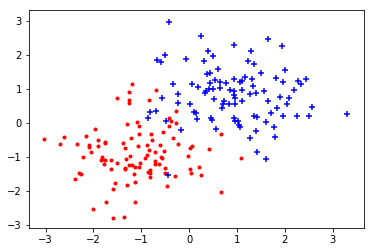

In [3]:
malaptools.plot_data(x, y)
plt.show()

We have implemented a LogisticRegression estimator class with estimator utilities.

In order to decide whether to train with SGD or SDCA, one can specify an *optimizer* at instanciation.

In [14]:
# choose parameters for the sgd optimizer
sgd_optimizer = LogisticSGD(c=1, eps=1e-4)

In [5]:
# make the classifier
sgd_clf = LogisticRegression(optimizer=sgd_optimizer)

Simple as that ! Then we can use it as any estimator.

In [6]:
sgd_clf.fit(x, y)

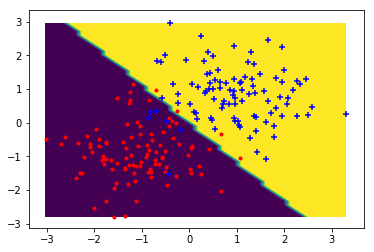

In [7]:
malaptools.plot_frontiere(x, sgd_clf.predict, step=50)
malaptools.plot_data(x, y)
plt.show()

In [8]:
sgd_clf.score_accuracy(x, y)

0.95

We can do the same for SDCA optimization algorithm.

In [9]:
sdca_optimizer = LogisticSDCA(c=1)

In [10]:
sdca_clf = LogisticRegression(optimizer=sdca_optimizer)

In [11]:
sdca_clf.fit(x, y)

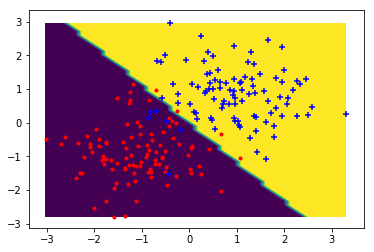

In [12]:
malaptools.plot_frontiere(x, sdca_clf.predict, step=50)
malaptools.plot_data(x, y)
plt.show()

In [13]:
sdca_clf.score_accuracy(x, y)

0.95